In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import random as rn
import yfinance as yf

In [158]:
start_date = '2018-01-01'
end_date = '2020-09-13'
data = yf.download('SBIN.NS', start = start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [159]:
#data = pd.read_csv('INDUSINDBK_NS.csv')
data = data.dropna()

In [160]:
data['lnclose'] = data.Close.apply(math.log)
data['dr'] = data.lnclose.diff()

In [161]:
lag_from_latest = 5
mean = data.iloc[:-(lag_from_latest+1)].dr.mean()
std = data.iloc[:-(lag_from_latest+1)].dr.std()
drift = mean - std**2/2
days=10
iterations=2000

In [162]:
S0 = float(data.iloc[-(lag_from_latest+1)].Close)
smc = []
for i in range(iterations):
    smc.append(S0)
    for j in range(days-1):
        t = smc[-1]*np.exp(drift+std*rn.gauss(0,1))
        smc.append(t)

In [163]:
smc = np.array(smc).reshape(iterations,days)

In [164]:
high_std = smc.mean(axis=0)+smc.std(axis=0)
low_std = smc.mean(axis=0)-smc.std(axis=0)

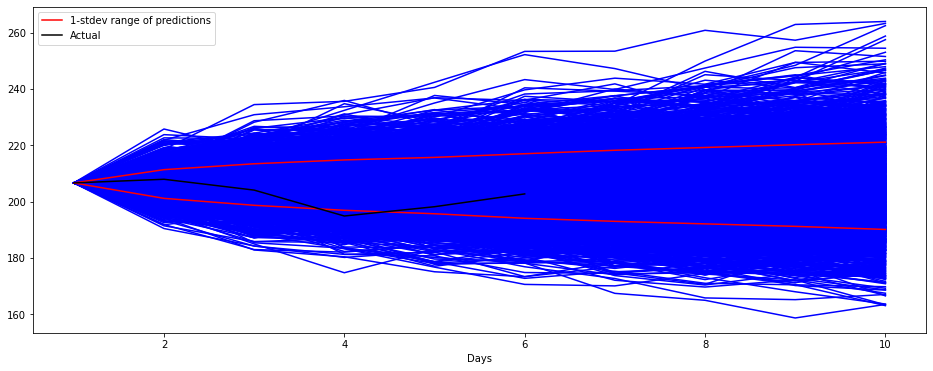

In [165]:
day = list(range(1,days+1))
plt.figure(figsize=(16,6))
plt.plot(day, smc.T, color='blue')
plt.plot(day, high_std, color='red', label='1-stdev range of predictions')
plt.plot(day, low_std, color='red')
plt.plot(day[:lag_from_latest+1], data.tail(lag_from_latest+1).Close, color='black', label='Actual')
plt.legend(loc="upper left")
plt.xlabel('Days')
plt.show()